**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [37]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [39]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [40]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_data1 = train_data.astype('float')
test_data1 = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2737 - acc: 0.9155 - val_loss: 0.1174 - val_acc: 0.9641
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0940 - acc: 0.9713 - val_loss: 0.0870 - val_acc: 0.9732
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0575 - acc: 0.9816 - val_loss: 0.0917 - val_acc: 0.9730
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0399 - acc: 0.9874 - val_loss: 0.0815 - val_acc: 0.9770
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0289 - acc: 0.9907 - val_loss: 0.0805 - val_acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0226 - acc: 0.9925 - val_loss: 0.0803 - val_acc: 0.9768
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0168 - acc: 0.9947 - val_loss: 0.0802 - val_acc

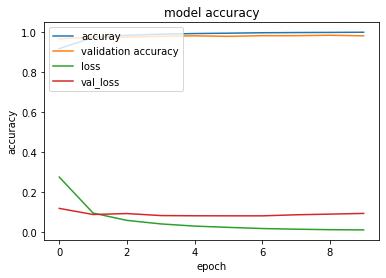

In [48]:

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

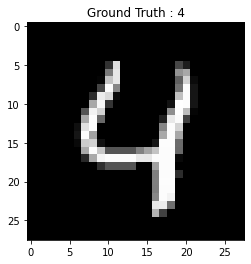

In [33]:
plt.imshow(test_images[4,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[4]))
plt.show()

In [34]:

x=model.predict_classes(test_data[[4],:])
print("Predicted label",test_labels[x])

Predicted label [4]


In [13]:
m = Sequential()
m.add(Dense(512, activation='relu', input_shape=(dimData,)))
m.add(Dense(512, activation='relu'))
m.add(Dense(512, activation='tanh'))
m.add(Dense(512, activation='sigmoid'))
m.add(Dense(10, activation='softmax'))
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
m.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.3190 - acc: 0.8982 - val_loss: 0.1472 - val_acc: 0.9546
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1024 - acc: 0.9689 - val_loss: 0.1070 - val_acc: 0.9670
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0653 - acc: 0.9805 - val_loss: 0.1231 - val_acc: 0.9657
Epoch 4/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0471 - acc: 0.9851 - val_loss: 0.0705 - val_acc: 0.9797
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0340 - acc: 0.9897 - val_loss: 0.0812 - val_acc: 0.9806
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0961 - val_acc: 0.9784
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0248 - acc: 0.9926 - val_loss: 0.0822 - val_acc

In [35]:

p = Sequential()
p.add(Dense(512, activation='relu', input_shape=(dimData,)))
p.add(Dense(512, activation='relu'))
p.add(Dense(10, activation='softmax'))
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data1, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data1, test_labels_one_hot)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 10.6717 - acc: 0.3368 - val_loss: 9.1710 - val_acc: 0.4306
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 9.1194 - acc: 0.4337 - val_loss: 9.3749 - val_acc: 0.4183
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 9.0163 - acc: 0.4402 - val_loss: 8.9117 - val_acc: 0.4468
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 8.9109 - acc: 0.4469 - val_loss: 9.4409 - val_acc: 0.4138
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 8.8168 - acc: 0.4528 - val_loss: 8.8328 - val_acc: 0.4519
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 8.7029 - acc: 0.4598 - val_loss: 8.7671 - val_acc: 0.4559
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 8.7702 - acc: 0.4556 - val_loss: 8.7278 - val_ac

In [36]:
from keras.models import Model
from keras.layers import Input
i=Input(shape=(784,))
x= Dense(512, activation='relu')(i)
x= Dense(512, activation='relu')(x)

x= Dense(10, activation='softmax')(x)
p = Model(input=i,output=x)
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2714 - acc: 0.9157 - val_loss: 0.1762 - val_acc: 0.9455
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0926 - acc: 0.9710 - val_loss: 0.0943 - val_acc: 0.9710
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0590 - acc: 0.9814 - val_loss: 0.0998 - val_acc: 0.9690
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0406 - acc: 0.9871 - val_loss: 0.0686 - val_acc: 0.9794
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0298 - acc: 0.9902 - val_loss: 0.0750 - val_acc: 0.9791
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0212 - acc: 0.9928 - val_loss: 0.0754 - val_acc: 0.9796
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0169 - acc: 0.9944 - val_loss: 0.0779 - val_acc